In [2]:
from fastai.vision.all import * 

In [3]:
path = untar_data(URLs.PETS)/'images'# 그림이 저장되어 있는 폴더의 주소

In [4]:
path.ls() # path.ls()[0]

(#7393) [Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

In [5]:
files= get_image_files(path) # 이미지 파일의 주소만 추출하는 함수
files

(#7390) [Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

In [6]:
files[0]

Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

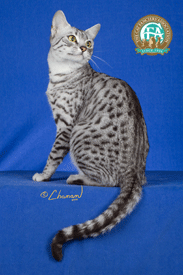

In [7]:
PILImage.create(files[0])
# PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')
# PILImage.create('Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

In [8]:
def label_func(fname):
    if fname[0].isupper():
        return 'cat'
    else:
        return 'dog'
    
label_func = lambda fname : 'cat' if fname[0].isupper() else  'dog'

In [9]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(224)) # 이미지 크기 통일 필요

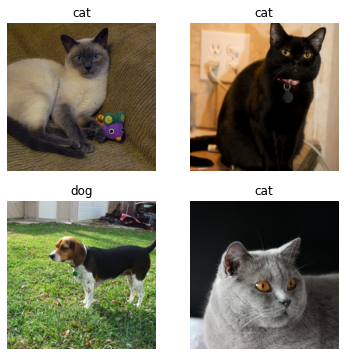

In [10]:
dls.show_batch(max_n=4)

### 학습 시켜보자

In [12]:
# 1차 목표: 개/고양이 판단하는 모형(resnet34)을 채용, 그 모형에 데이터를 넣어서 학습, 그 모형의 결과를 판단
# 2차 목표: 그 모형에 "새로운" 자료를 전달하여 이미지를 분류

# cnn_learner 라는 함수를 이용해서 1차목표와 2차목표를 달성할 "Object"를 만들것임. 
# 오브젝트란? 정보와 함수를 동시에 가지는 어떠한 집합체 
# 오브젝트.명사이름 : 이대로 하나의 변수처럼 쓸 수 있음. 
# 오브젝트.동사이름 : 이대로 하나의 함수처럼 쓸 수 있음. (이때 함수의 첫번째 입력은 명시하지 않아도 오브젝트 그 자체가 된다)

## clafr에 필요한 명사(=정보) <- 우리가 넣어줘야하는 것들이 대부분
# (1) 모델정보: classifier로 어떤 모델을 채용할 것인가? (유명한 모델이 무엇인가? 잘 맞추는 모델이 무엇인가)
# (2) 데이터: 데이터를 줘야함
# (3) 평가기준표: 채점을 할 지표 
## clafr에 필요한 동사(=함수) <- 이미 구현이 되어있음 
# (1) 학습 
# (2) 결과를 판단
# (3) 예측 

clsfr = cnn_learner(dls,resnet34,metrics=error_rate)

- fine_tune()은 모든 가중치를 학습하는 것이 아니라 일부만 학습하는 것임. 
  - fine_tune()이외의 방법으로 학습할 수도 있음.

In [25]:
clsfr.fine_tune(1) # 학습

epoch,train_loss,valid_loss,error_rate,time
0,0.137038,0.022387,0.006089,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.083019,0.023682,0.005413,00:53


- 기존 데이터를 잘 맞추는지 확인

In [29]:
clsfr.predict(files[7])
# 강아지라고 맞춰야 함
# 입력으로 이미지파일의 주소를 넣어줬음

('dog', TensorBase(1), TensorBase([8.5275e-09, 1.0000e+00]))

- clsfr.predict(X)말고 clsfr.model(X)도 이용 가능  
- 이때 해당 함수의 입력변수 X의 shape이 (?,3,224,224)의 형태의 텐서이어야함
  - X[0].size() -> 3,224,224가 나옴
  - 해당 함수의 입력으로 사용할 수 없음
  - <TRICK>
    - X[0:1].size() -> 1,3,224,224가 나온다
    - 해당 함수의 입력변수로 사용할 수 있게 됨

In [ ]:
X,y = dls.one_batch() # 방법2
# 이때 dls.one_batch()는 random으로 가져옴.
clsfr.model(X[0:1]) # clsfr의 다른 version

- 학습 결과를 보여주는 메서드

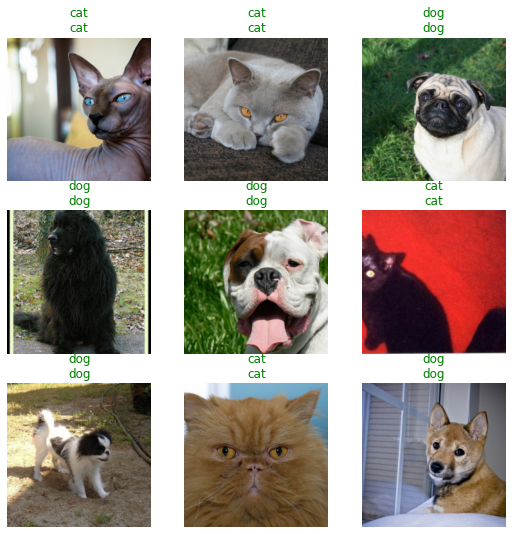

In [30]:
clsfr.show_results(max_n=9, shuffle=False)

### 오답분석

In [31]:
interpreter = Interpretation.from_learner(clsfr) # 오답을 분석하는 object를 만듦.. 재료는 클래시파이어! 

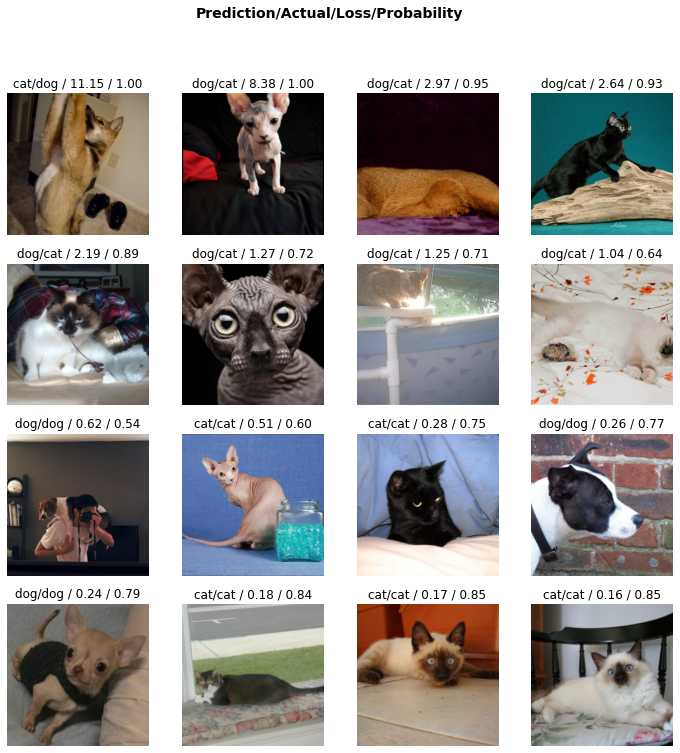

In [32]:
interpreter.plot_top_losses(16) # 가장 오류가 높은 이미지들을 정렬하여 보여주는 메서드

In [33]:
clsfr.predict(files[7])

('dog', TensorBase(1), TensorBase([8.5275e-09, 1.0000e+00]))

In [ ]:
clsfr.predict('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg')

In [35]:
clsfr.predict(PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg'))

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.3439e-10]))

# $\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star$

- clsfr로 예측할 때
  - 이미지파일의 주소를 넣어줘도 되고(맨앞에 Path가 붙어있는 경우와 그렇지 않은 경우 두가지)
  - PILImage.creat로 생성한 이미지 자체를 넣어줘도 무방!
  - 이미지파일 이름만! (이땐, 이미지파일의 주소와 현 작업경로가 당연히 동일해야함)
- PILImage로 사진 확인할 때도
  - 이미지파일의 주소 자체를 넣어주는 경우
  - 앞에 path가 붙어있는 경우 
  - 이미지파일 이름만! (이땐, 이미지파일의 주소와 현 작업경로가 당연히 동일해야함)

# $\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star$

- 인터넷에 있는 이미지파일의 주소를 이용하여 이미지 분류하는 방법

In [40]:
img=PILImage.create(requests.get('http://image.dongascience.com/Photo/2022/06/6982fdc1054c503af88bdefeeb7c8fa8.jpg').content)
clsfr.predict(img)

('dog', TensorBase(1), TensorBase([7.3712e-06, 9.9999e-01]))

---

----

----

In [1]:
from fastai.collab import * ## 추천시스템
from fastai.text.all import * ## 텍스트분석

In [2]:
import pandas as pd

## 추천시스템

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv")

## 1단계 - dls 생성

In [6]:
dls = CollabDataLoaders.from_df(df)
dls.show_batch()

,user,item,rating
0,49,12,0.921155
1,46,18,1.087139
2,22,2,3.635048
3,63,11,3.929210
4,60,1,0.862892
5,48,18,0.779323
6,83,12,3.788958
7,30,5,4.041057
8,97,17,3.989815
9,32,10,4.161709


In [16]:
X,y = dls.one_batch()
X[0],y[0]
# 한 배치에 64개의 데이터가 들어있음

(tensor([37,  9]), tensor([4.0088]))

## 2단계 - lrnr 생성

In [17]:
lrnr = collab_learner(dls, y_range=(0,5))

In [18]:
id(dls) == id(lrnr.dls) # 두 객체의 메모리 주소가 동일 -> 이름만 다르고 하는 일은 동일함을 알 수 있다. 
# lrnr.dls.show_batch() = dls.show_batch()

True

## 3단계 - 학습

In [ ]:
lrnr.fit(10)
# 이미지 분석에선 fine_tune을 사용했었음

## 4단계 - 예측
(1) 배치 하나 전체를 예측

In [ ]:
# 예측하는 경우가 두 가지가 있을 수 있음
# 1. 배치 하나에 대해 예측해보는 경우 -> 이 경우는 그럼 64개의 data에 대해서 예측이 되겠지?
# 2. 또는 X[0:1]과 같이 하나의 data에 대해서만 예측을 수행해보는 경우

# 지금은 전체 배치에 대해서 예측을 수행하는 경우
yhat = lrnr.model(X.to("cuda:0")) # .to("cuda:0") => gpu로 올려서 계산하기

In [ ]:
yhat
# 이제 y값과 비교해보자

In [ ]:
y
# yhat과 별로 유사 X
# lrnr.fit(10)
# 이 문장을 두어번 더 돌리면 즉, 학습을 더 하면 예측 성능이 더 좋아질 것이다.

In [ ]:
# 이제 하나의 배치가 아닌 한 case에 대해서 예측을 수행해보자
lrnr.model(X[0:1].to("cuda:0"))
# 반환된 값을 원래 df의 feature중 rating에 해당된 평점!

tensor([0.9233], device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
# 하나의 유저가 하나의 아이템을 선택했다고 가정하고 예측(주어진 자료중에서 예측)
# 주어진 자료중에서 예측이라는 말?...
# 우리는 1이라는 사람에 대해 학습을 시켜왔으니..
Xnew= torch.tensor([[1,2]]) # 넣어주는 형식 주의!
lrnr.model(Xnew.to("cuda:0"))

tensor([3.9668], device='cuda:0', grad_fn=<AddBackward0>)

----

## 텍스트분석

In [23]:
df  = pd.DataFrame({'text':['h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??']*20000})
print(len(df))

20000


In [25]:
df.head(2)

,text
0,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??
1,h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??


### 1단계 - dls 생성

In [28]:
dls = TextDataLoaders.from_df(df, text_col = 'text', is_lm=True)
# text 생성에 관심이 있다면 is_lm = True
# text_col => 텍스트가 들어있는 칼럼명

In [32]:
dls.show_batch()
## text가 x역할 , text_가 y역할
## 배치 하나당 64개의 data가 들어있음

,text,text_
0,xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o,h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o .
1,? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l,xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o
2,? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l,? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l
3,o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e,? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l
4,l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h,o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e
5,l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos,l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h
6,e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ?,l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos
7,h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ?,e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ?
8,! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o,h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ? ? xxbos h e l l o . h e l l o ! h e l l o ? h e l l o ! ! h e l l o ?


### 2단계 - lrnr 생성

In [ ]:
lrnr = language_model_learner(dls, AWD_LSTM)
# AWD_LSTM => 이미지 분석에서 resnet

# 3단계

In [ ]:
lrnr.fit(1)
#lrnr.fit(10)
#이렇게 설정하면 당연히 학습이 더 잘 될 것

epoch,train_loss,valid_loss,time
0,1.949291,0.861069,00:38


In [ ]:
lrnr.predict("h e", n_words=30)

'h e e e h e h h o h l h h e h l o ? e l h h h h e h l h h h e'

In [ ]:
lrnr.fit(5)

epoch,train_loss,valid_loss,time
0,0.929660,0.365375,00:37
1,0.626867,0.248410,00:34
2,0.475367,0.210058,00:35
3,0.407356,0.192090,00:35


In [ ]:
lrnr.predict("h e", n_words=30)

---

### 생성모형이란? 통계학과 버전의 설명 

`-` 이미지 $\boldsymbol{x}$가 주어졌을 경우 라벨을 $y$라고 하자. 

`-` 이미지를 보고 라벨을 맞추는 일은 $p(y| \boldsymbol{x})$에 관심이 있는 것과 동일하다.

`-` 이미지를 생성하는 일은 $p(\boldsymbol{x},y)$에 관심이 있는것이다. 

`-` 데이터의 생성확률 $p(\boldsymbol{x},y)$을 알면 클래스의 사후확률 $p(y|\boldsymbol{x})$를 알 수 있음. (아래의 수식 참고) 하지만 역은 불가능 

$$p(y|x) = \frac{p(x,y)}{p(x)} = \frac{p(x,y)}{\sum_{y}p(x,y)} $$

- 즉 이미지를 생성하는 일은 이미지 라벨 맞추는 것보다 더 어려운 일이라 해석가능 

### GAN의 원리

`-` GAN은 생성모형중 하나임 

`-` GAN의 원리는 경찰과 위조지폐범이 서로 경쟁을 통하여 서로 발전하는 모형으로 설명할 수 있다. 

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜 가짜이미지를 만든다(generate) 

In [ ]:
from fastai.vision.all import *  ## GAN (이미지분석) 
from fastai.vision.gan import * ## GAN (이미지생성)

| |이미지분석(CNN) | 추천시스템 | 텍스트분석 | GAN | 
|:-:|:-:|:-:|:-:|:-:|
|1단계|ImageDataLoaders|CollabDataLoaders| TextDataLoaders | DataBlock -> dls |  
|2단계|lrnr = cnn_learner()|collab_learner()| language_model_learner() | GANLearner.wgan() | 
|3단계|lrnr.fine_tune(1)|lrnr.fit()| lrnr.fit() | lrnr.fit() |
|4단계|lrnr.predict(), lrnr.model(X)|lrnr.model(X)| lrnr.predict() | | 

## 이미지분석, 추천시스템, 텍스트분석의 정리 

`-` 데이터는 모두 아래와 같은 느낌이다. 

(1) 데이터는 $(X,y)$의 형태로 정리되어 있다. 

(2) $y$는 우리가 관심이 있는 변수이다. 즉 우리는 $y$를 적절하게 추정하는 것에 관심이 있다.

(3) $X$는 $y$를 추정하기 위해 필요한 정보이다. 


|$X$ = 설명변수 = 독립변수 | $y$ = 반응변수 = 종속변수 | 비고 | 순서 | 예시 | 
|:-:|:-:|:-:|:-:|:-:
|이미지|카테고리|합성곱신경망| 상관없음 | 개/고양이 이미지 구분 |
|유저,아이템|평점|추천시스템| 상관없음 | 넷플릭스 영화추천 |
|과거~오늘까지의주가|내일주가|순환신경망| 순서상관있음 | 주가예측 |
|처음 $m$개의 단어(혹은 문장)|이후 1개의 단어(혹은 문장)|순환신경망| 순서상관있음 | 챗봇, 텍스트생성 |
|처음 $m$개의 단어(혹은 문장)|카테고리|순환신경망| 순서상관있음 | 영화리뷰 텍스트 감정분류 | 

`-` 학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한 "규칙" 혹은 "원리"를 찾는 것이다. 
- 학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한 "맵핑"을 찾는 것이다. 
- 학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한 "함수"을 찾는 것이다. 즉 $y\approx f(X)$가 되도록 만드는 $f$를 잘 찾는 것이다. (이 경우 함수를 추정한다라고 표현) 
- 학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한 "모델"을 찾는 것이다. 즉 $y\approx model(X)$가 되도록 만드는 $model$을 잘 찾는 것이다. (이 경우 모형을 학습시킨다라고 표현) 
- **학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한 "네트워크"을 찾는 것이다. 즉 $y\approx net(X)$가 되도록 만드는 $net$을 잘 찾는 것이다. (이 경우 모형을 네트워크를 학습시킨다라고 표현)**

`-` prediction이란 학습과정에서 찾은 "규칙" 혹은 "원리"를 $X$에 적용하여 $\hat{y}$을 구하는 과정이다. 학습과정에서 찾은 규칙 혹은 원리는 $f$,$model$,$net$ 으로 생각가능한데 이에 따르면 아래가 성립한다. 
- $\hat{y} = f(X)$
- $\hat{y} = model(X)$
- $\hat{y} = net(X)$

***자잘한개념***

`-` $\hat{y}$는 $X$가 주어진 자료에 있는 값인지 아니면 새로운 값 인지에 따라 지칭하는 이름이 미묘하게 다르다.

(경우1) $X \in data$: $\hat{y}=net(X)$ 는 predicted value, fitted value 라고 부른다. 

(경우2) $X \notin data$: $\hat{y}=net(X)$ 는 predicted value, predicted value with new data 라고 부른다.  

`-` 경우1은 "$loss$ = $y$ 와 $\hat{y}$ 의 차이" 를 정의할 수 있으나 경우2는 그렇지 않다. 

### GAN의 Architecture

`-` 아래와 같은 두 모델(네트워크)를 생각하자. 
- 위조범네트워크: X=노이즈(=아무숫자) $\to$ y=지폐이미지(=가짜지폐) 
- 경찰네트워크: X={가짜지폐,진짜지폐} $\to$ y={진짜,가짜} 

`-` 전체 알고리즘은 아래와 같은 순서로 돌아간다. (전체 이미지 자료는 $n$개라고 하자) 

(1) 적당한 크기의 $n$개의 노이즈가 위조범네트워크에 입력으로 들어감 

(2) 위조범네트워크는 적당한 크기의 $n$개의 노이즈를 입력으로 받고 출력으로 $n$개의 이미지를 뱉어냄. 

(3) 위조범이 뱉어낸 이미지와 진짜이미지를 합쳐 $2n$개의 자료를 만들고 이를 경찰네트워크의 입력으로 넣음. 

(4) 경찰네트워크는 $2n$개의 자료를 입력으로 받아서 $2n$개의 예측결과를 제공. 

## GAN 실습 

### 1단계

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
dblock = DataBlock(blocks=(TransformBlock,ImageBlock),
          get_x = generate_noise,
          get_items=get_image_files,
          item_tfms=Resize(32))
dls = dblock.dataloaders(path) 

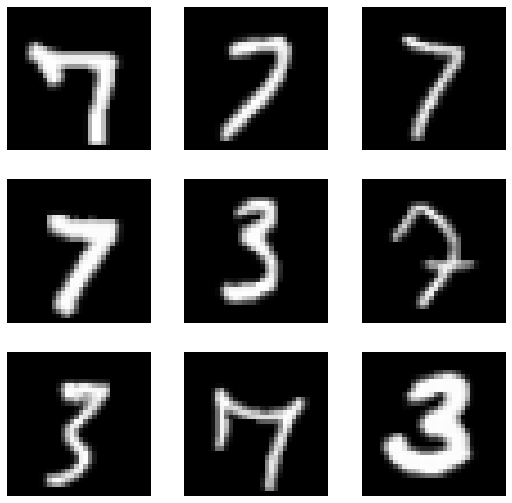

In [ ]:
dls.show_batch()

### 2단계 

In [ ]:
counterfeiter = basic_generator(32,n_channels=3,n_extra_layers=1) # 32*32의 이미지가 칼라이미지로 출력. 
police = basic_critic(32,n_channels=3,n_extra_layers=1) # 32*32의 칼라이미지가 입력으로 들어옴. 

In [ ]:
lrnr = GANLearner.wgan(dls,counterfeiter,police) 

### 3단계

`-` lrnr.fit(10) 진행 

In [ ]:
lrnr.fit(10)

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.535002,0.308544,0.308544,-0.752480,00:03
1,-0.576589,0.352612,0.352612,-0.766771,00:02
2,-0.577845,0.314223,0.314223,-0.765236,00:02
3,-0.579443,0.330473,0.330473,-0.757671,00:02
4,-0.558964,0.349833,0.349833,-0.721869,00:02
5,-0.497595,0.160872,0.160872,-0.468182,00:02
6,-0.558232,0.342285,0.342285,-0.736141,00:02
7,-0.556327,0.295825,0.295825,-0.723297,00:02
8,-0.489663,0.249928,0.249928,-0.704251,00:02
9,-0.554174,0.294018,0.294018,-0.712920,00:02


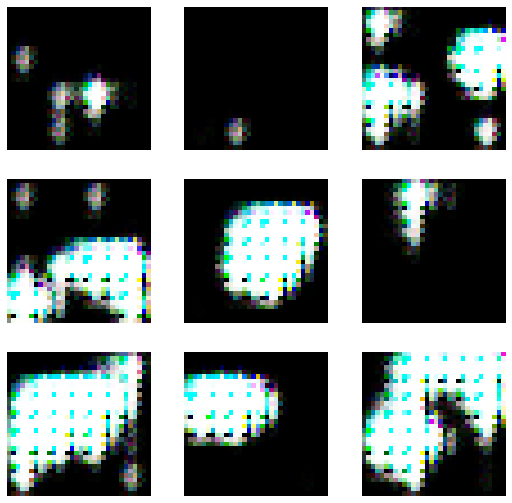

In [ ]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총20회

In [ ]:
lrnr.fit(10)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.515553,0.348663,0.348663,-0.728708,00:02
1,-0.557362,0.242816,0.242816,-0.741521,00:02
2,-0.458179,0.317015,0.317015,-0.683592,00:02
3,-0.519457,0.302876,0.302876,-0.723633,00:02
4,-0.555187,0.224915,0.224915,-0.734270,00:02
5,-0.509961,0.241438,0.241438,-0.483068,00:02
6,-0.447777,0.215373,0.215373,-0.662069,00:02
7,-0.507295,0.219423,0.219423,-0.697338,00:02
8,-0.476715,0.205101,0.205101,-0.622279,00:02
9,-0.478700,0.235555,0.235555,-0.574554,00:02


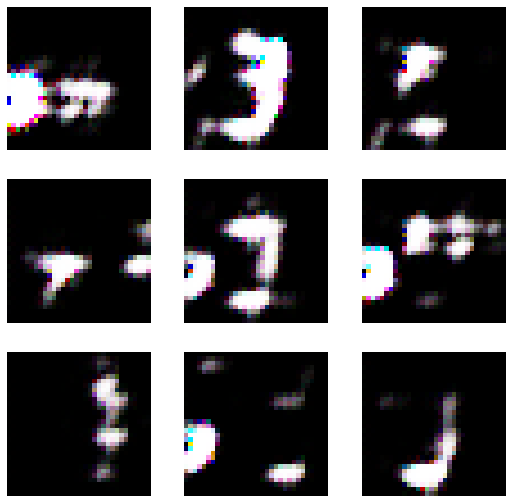

In [ ]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총30회

In [ ]:
lrnr.fit(10)

epoch,train_loss,valid_loss,gen_loss,crit_loss,time
0,-0.469555,0.249645,0.249645,-0.692078,00:02
1,-0.474322,0.173602,0.173602,-0.679932,00:02
2,-0.441294,0.224790,0.224790,-0.645440,00:02
3,-0.427063,-0.373755,-0.373755,-0.139448,00:02
4,-0.368140,0.238584,0.238584,-0.645779,00:02
5,-0.382201,0.292598,0.292598,-0.616749,00:02
6,-0.353511,0.159032,0.159032,-0.468200,00:02
7,-0.308234,0.109199,0.109199,-0.499512,00:02
8,-0.342653,0.235540,0.235540,-0.429085,00:02
9,-0.291696,0.027944,0.027944,-0.444815,00:02


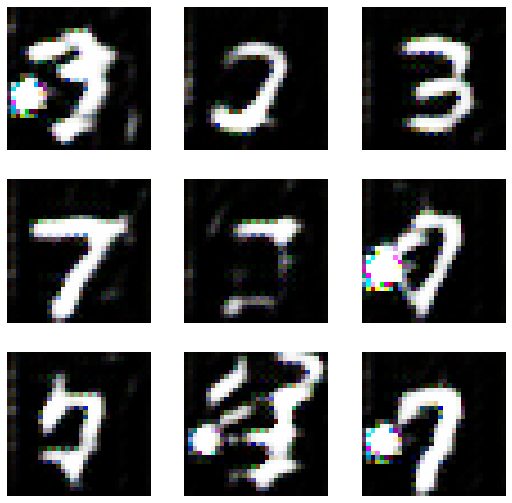

In [ ]:
lrnr.show_results()

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜 이미지를 0.5의 확률로만 진짜라고 말할때 = 가짜 이미지를 0.5의 확률로만 가짜라고 말할때) 학습을 멈춘다. 